Group: LLZWTZSL

We want change it to:

Group: 1159pm

Team Members:

Renjie(Sebastian) Lu (48030051)

Liwei Li (47708015)

Wu Zhongling(47777045)

Tianyi Zheng(47777123)

# 1. Business Understanding

##  1.1 overview of the dataset

The sign language, unlike other mature language systems, is a developing language for the disabilities. ASL (American Sign Language) is a language completely separate and distinct from English. It contains all the fundamental features of language, with its own rules for pronunciation, word formation, and word order. There is no universal sign language. Different sign languages are used in different countries or regions. For example, British Sign Language (BSL) is a different language from ASL, and Americans who know ASL may not understand BSL but both two countries are English speaking countries and both two sign languages are designed based on English grammar. Another point, unlike many spoken languages, the voice-to-text technology can be applied, few similar technologies can be applied to sign language.

## 1.2 Purpose 

The dataset we have only include finger spelling which is part of ASL and is used to spell out English words. In the finger spelled alphabet, each letter corresponds to a distinct handshape. Finger spelling is often used for proper names or to indicate the English word for something. The dataset was originally collected to train a CNN to recognize ASL handshapes. 

The dataset contains RGB images of ASL handshapes corresponding to 24 letters of the English alphabet (note that "X" and "Z" are excluded since they rely on movement). Note that this dataset was produced from 5 different non-native signers. Some of the handshapes are different from what traditional/native signers sign. 

## 1.3 Prediction Task

The goal of analyzing this data is to make some contributions to ASL and the deafs. It is very common that subtitles are automatically generated by voice-to-text technology in many videos but how many people really cared about making the subtitles for those videos? ASL videos including news and many TV programs are very popular among deaf people in Facebook. The amount of time taken to subtitle a video can be many times longer than it takes to film it. If we have similar technology like voice-to-text (handshapes-to-text), it will be easier to make subtitles for ASL videos. If we have technology like handshape-to-text, it will be easier to understand other sign languages like BSL. That can also avoid the situation that Americans who know ASL may not understand BSL. In other words, if we can translate handshapes to text, that could be the bridge between ASL and BSL.

In conclusion, we would like to make contributions to ASL and the deafs by working in ASL and other sign languages recognition and working on tool frame that can be versatile for sign languages as voice-to-text technology is today. 

Reference: https://limpingchicken.com/2013/04/16/the-question-should-bsl-videos-always-include-english-subtitles/

## 1.4 Importance of the data

This data is not only important for training purpose, but also for analyzing. Upon analyzing those handshapes, we can make contributions to technology like handshapes-to-text.

## 1.5 Measure of success

It is good to discuss how we define success of our project. What we are learning in this project is the basic handshapes corresponding to 24 letters of the English alphabet exclude 2 letters (“X” & “Z”) , since the 2 letter rely on movement. We also want to make contributions to technology like handshapes-to-text. The required accuracy rate for automated speech recognition (ASR) is 99% (https://www.3playmedia.com/2019/04/11/captioning-accuracy-how-to-measure-error-rates/), which there is 1% error rate like formatting and word error can’t be avoid. As comparison, we would like to apply the same accuracy rate and error rate to our study. This error rate is still can’t be avoidable in our texture which is commonly cause by Non-standard gesture and some undetectable movement. Without learning the letters like “X” & “Z” which rely on movement, our error rate may be reduced to a significant level which may below 1%. However, we still keep 1% error rate as definition of success of our learning because we believe 1% error on subtitle text won’t affect understanding the whole text.

# 2. Data Preparation

## 2.1  Read in your images as numpy arrays

In [3]:
import numpy as np
import cv2
import os
import random

# path of your dataset
PATH = './dataset'
# number of images randomly picked from each 
N = 10
SIZE = (64,128)

# img_data, img_name, im
class sign_language:
#     dim = (64,64)
    def __init__(self, path, n, dim):
        self.path = path
        self.signers = os.listdir(path)
        self.img_paths = []
        self.names = []
        self.targets = []
        self._dim = dim
        for signer in self.signers:
            alphabets = os.listdir(os.path.join(path,signer))
            for a in alphabets:
                imgs = os.listdir(os.path.join(path,signer,a))
                colors = []
                for i in imgs:
                    if i[:5] == 'color':
                        colors.append(i)
                picks = random.sample(colors, n)
                self.img_paths.extend([os.path.join(PATH,signer,a,p) for p in picks])
        
        datas = []
        for img in self.img_paths:
           
            try:
                i = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
                resized = cv2.resize(i, (self._dim[0],self._dim[1]))
                reshaped = np.reshape(resized,(1, self._dim[0]*self._dim[1])) #linearize
#                 print
                datas.append(reshaped[0])
            except:
                print("Failed to resize: ", img)
            
            feature = os.path.splitext(img)[0].split('/')[-3:]
            target = feature[1]
            name = '/'.join(feature)
            self.targets.append(target)
            self.names.append(name)

        self.data = np.array(datas,dtype="float")


## 2.2 Linearize the images to create a table of 1-D image features 

In [4]:
signs = sign_language(PATH, N, SIZE)

X = signs.data
#print(X)
names = signs.names
y = [ord(t) for t in signs.targets]
#print(y)
n_samples, n_features = X.shape
w, h = SIZE
n_classes = len(set(y))

print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: {}".format(n_classes))
print("Image Sizes {} by {}".format(h,w))

n_samples: 1200
n_features: 8192
n_classes: 24
Image Sizes 128 by 64


Read our dataset and change image size to 64 * 64. For convince (quick run) in this project, we randomly picked 10 pictures of each letter per person. We have 24 letter and 5 signer as mentioned in Business Understanding. Overall, we have 10*24*5=1,200 pictures in total.

## 2.3 Visualize several images

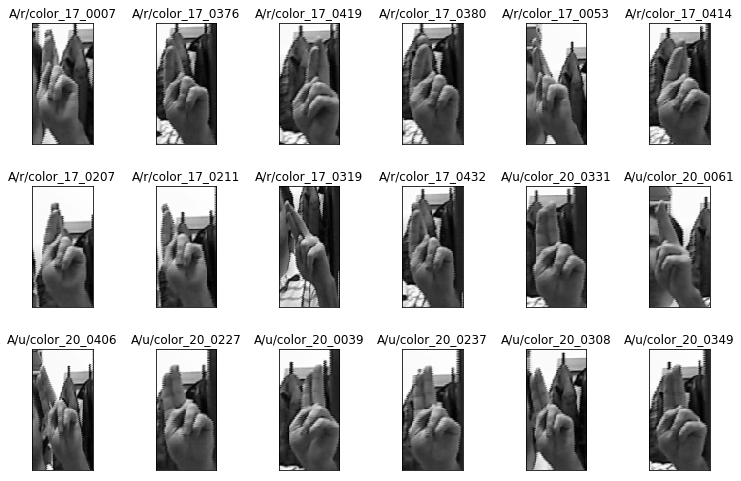

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# a helper plotting function
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot_gallery(X, names, h, w) # defaults to showing a 3 by 6 subset of the faces

# 3. Data Reduction

## 3.1 linear dimensionality reduction

In [6]:
def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })
        

In [7]:
from sklearn.decomposition import PCA

n_components = 400
print ("Extracting the top %d eigensign from %d signs" % (
    n_components, X.shape[0]))

pca = PCA(n_components=n_components)
%time pca.fit(X.copy())
eigensigns = pca.components_.reshape((n_components, h, w))
plot_explained_variance(pca)

Extracting the top 400 eigensign from 1200 signs
CPU times: user 6.11 s, sys: 311 ms, total: 6.42 s
Wall time: 3.6 s


We define a plot function to show the explained variance from PCA. From the function we extract the top 400 eigensigns from the 1200 features. The plot visualize the explained variances of each component on PCA. The top 400 eigens are close to represent the 97% of the image data. We finally decided to use these 400 tops to represent our image data set. 

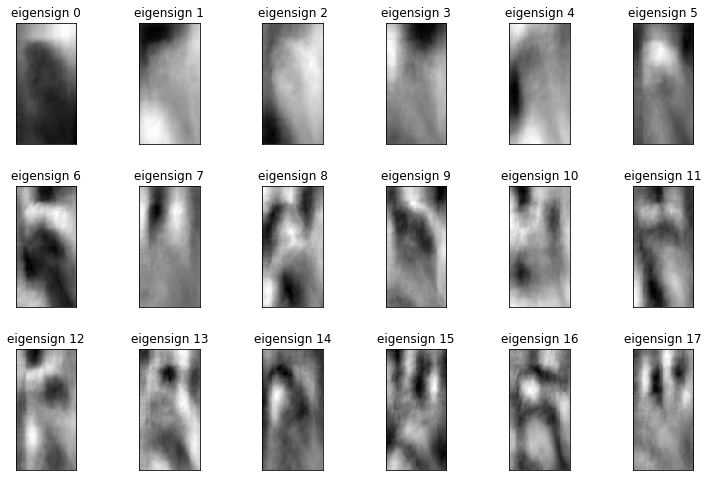

In [8]:
eigensign_titles = ["eigensign %d" % i for i in range(eigensigns.shape[0])]
plot_gallery(eigensigns, eigensign_titles, h, w)

In [9]:
def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image
    
idx_to_reconstruct = 21    
X_idx = X[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(pca,X_idx.reshape(1, -1))

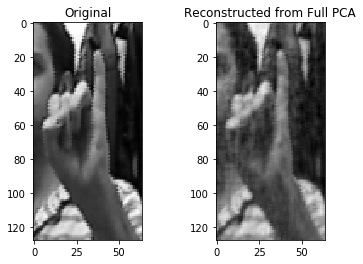

In [10]:
plt.subplot(1,2,1)
plt.imshow(X_idx.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid(False)
plt.subplot(1,2,2)
plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Reconstructed from Full PCA')
plt.grid(False)

This is the comparison between one original image and reconstructed image. The images after conduct by PCA are more blurry than original. 

In [11]:
%%time
from sklearn.decomposition import KernelPCA

n_components = 400
print ("Extracting the top %d eigensigns from %d signs, not calculating inverse transform" % (n_components, X.shape[0]))

variance = np.var(X)

kpca = KernelPCA(n_components=n_components, kernel='rbf', 
                fit_inverse_transform=True, gamma=2.5, # very sensitive to the gamma parameter,
                remove_zero_eig=True)  
kpca.fit(X.copy())

Extracting the top 400 eigensigns from 1200 signs, not calculating inverse transform
CPU times: user 2.77 s, sys: 227 ms, total: 3 s
Wall time: 1.73 s


KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
          fit_inverse_transform=True, gamma=2.5, kernel='rbf',
          kernel_params=None, max_iter=None, n_components=400, n_jobs=None,
          random_state=None, remove_zero_eig=True, tol=0)

In [12]:
from ipywidgets import widgets  # make this interactive!

import warnings
# warnings.simplefilter('ignore', DeprecationWarning)
# warnings.simplefilter("always",DeprecationWarning)



def plt_reconstruct(idx_to_reconstruct):
    idx_to_reconstruct = np.round(idx_to_reconstruct)
    
    reconstructed_image = pca.inverse_transform(pca.transform(X[idx_to_reconstruct].reshape(1, -1)))
    reconstructed_image_kpca = kpca.inverse_transform(kpca.transform(X[idx_to_reconstruct].reshape(1, -1)))
    
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,3,1)
    plt.imshow(X[idx_to_reconstruct].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(names[idx_to_reconstruct])
    plt.grid(False)
    
    plt.subplot(1,3,2)
    plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Full PCA')
    plt.grid(False)
    
    plt.subplot(1,3,3)
    plt.imshow(reconstructed_image_kpca.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Kernel PCA')
    plt.grid(False)
    
    
widgets.interact(plt_reconstruct,idx_to_reconstruct=(0,n_samples-1,1),__manual=True)

interactive(children=(IntSlider(value=599, description='idx_to_reconstruct', max=1199), Output()), _dom_classe…

<function __main__.plt_reconstruct(idx_to_reconstruct)>

The result of KPCA dimension reduction result. It seems the KPCA reconstructed images are closer to origins than PCA, visually. 

# 3.3 Comparasion Between Linear Dimensions and Non-linear Dimensions

## 3.3.1 Structure Similarity

In [14]:
from skimage.measure import compare_ssim as ssim

list_pca_ssim = []
for idx in range(n_samples):
    pca_ssim = ssim(pca.inverse_transform(pca.transform(X[idx].reshape(1, -1))).reshape(h,w),
                    X[idx].reshape(1, -1).reshape(h,w))
    list_pca_ssim.append(pca_ssim)
    
print("Sturcture Similarities of pca with mean at %.6f, variance at %.6f" % (np.mean(list_pca_ssim), np.var(list_pca_ssim)))

Sturcture Similarities of pca with mean at 0.676689, variance at 0.004361


In [15]:
list_kpca_ssim = []
for idx in range(n_samples):
    pca_ssim = ssim(kpca.inverse_transform(kpca.transform(X[idx].reshape(1, -1))).reshape(h,w),
                    X[idx].reshape(1, -1).reshape(h,w))
    list_kpca_ssim.append(pca_ssim)

print("Sturcture Similarity of kernal-pca with mean at %.6f, variance at %.6f: " % (np.mean(list_kpca_ssim), np.var(list_kpca_ssim)))

Sturcture Similarity of kernal-pca with mean at 0.526676, variance at 0.012354: 


Structure similarity is used for measuring the similarity between two images.

In fact, The PCA transformation performs better than Kernel-PCA.

In [16]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X,y)

# print(np.hstack((lr.intercept_[:,np.newaxis],lr.coef_)))
yhat = lr.predict(X)

print('Accuracy of: %.3f'%accuracy_score(y,yhat))

/Users/LevyLi/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/LevyLi/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



Accuracy of: 1.000
CPU times: user 2min 47s, sys: 3.79 s, total: 2min 51s
Wall time: 1min 32s


In [21]:
# we randomly pick up 2 pictures from 24 classes of 5 person
test_signs = sign_language(PATH, 2, SIZE)

test_y = [ord(t) for t in test_signs.targets]
test_yhat = lr.predict(test_signs.data)

print('Accuracy of: %.3f'%accuracy_score(test_y,test_yhat))

Accuracy of: 0.546


Logistic Regression is perfect to classify the trainning data, but seems to be a lack of predictivity.

# 3.4 Feature Extraction

In [22]:
from skimage.feature import daisy
from sklearn.metrics.pairwise import pairwise_distances

def apply_daisy(row, shape):
    feat = daisy(row.reshape(shape), step=10, radius=10, rings=2, histograms=6,orientations=8,visualize=False)
    return feat.reshape((-1))

daisy_features = np.apply_along_axis(apply_daisy, 1, X, (h,w))
print(daisy_features.shape)
dist_matrix = pairwise_distances(daisy_features)

(1200, 5720)


(37, 256)
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Original Image vs. Transformed Image')

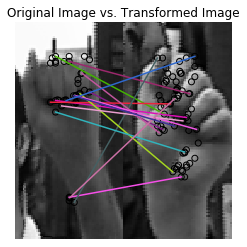

In [66]:
from skimage.feature import ORB, match_descriptors, plot_matches
from skimage.io import imshow

idx_to_reconstruct = random.sample([i for i in range(len(y)) if y[i] == ord('a')], 2)
img1  = X[idx_to_reconstruct][0].reshape((h,w))
img2  = X[idx_to_reconstruct][1].reshape((h,w))


descriptor_extractor = ORB(n_keypoints=70)

descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

print(descriptors1.shape)

matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)

fig, ax = plt.subplots(nrows=1, ncols=1)

print(ax)
plt.gray()

plot_matches(ax, img1, img2, keypoints1, keypoints2, matches12)
ax.axis('off')
ax.set_title("Original Image vs. Transformed Image")
# def apply_daisy

In [25]:
from skimage.feature import ORB, match_descriptors, plot_matches
from skimage.io import imshow

descriptor_extractor = ORB(n_keypoints=30)


ORB_descriptors = []
ORB_keypoints = []

for idx in range(len(X)):
    descriptor_extractor.detect_and_extract(X[idx].reshape((h,w)))
    descriptors = descriptor_extractor.descriptors
    ORB_descriptors.append(descriptors)
    ORB_keypoints.append(descriptor_extractor.keypoints)

     

In [53]:
# ORB_descriptors = np.array(ORB_descriptors)
print(ORB_descriptors.shape)

des = np.array(ORB_descriptors.copy()).reshape(len(ORB_descriptors),1)
print(des.shape)
def apply_matches(descriptors):
#     print(descriptors[0].shape)
    matches = []
    for d in ORB_descriptors:
#         print(d.shape)
#         print(descriptors[0])
        
        match = match_descriptors(ORB_descriptors[0],d,cross_check=True)
        matches.append(match)
    return matches

ORB_matches = np.apply_along_axis(apply_matches, 1, des)   

(1200,)
(1200, 1)


In [58]:
print(ORB_matches.shape)
print(ORB_descriptors.shape)
# print(ORB_keypoints)

(1200, 1200)
(1200,)


In [68]:
from ipywidgets import widgets  
import warnings
import copy
from ipywidgets import fixed

def closest_image(dmat,idx1):
    distances = copy.deepcopy(dmat[idx1,:]) # get all image diatances
    distances[idx1] = np.infty # dont pick the same image!
    idx2 = np.argmin(distances)
    
    distances[idx2] = np.infty
    idx3 = np.argmin(distances)
    
    orb_matches = ORB_matches[idx1,:]
    dis_matches = [len(m) for m in orb_matches]
    
    dis_matches[idx1] = np.infty
    idx4 = np.argmin(dis_matches)
    print(idx4)
    dis_matches[idx4] = np.infty
    idx5 = np.argmin(dis_matches)
    print(idx5)
    
    plt.figure(figsize=(10,16))
    plt.subplot(1,3,1)
    imshow(X[idx1].reshape((h,w)),cmap=plt.cm.gray)
    plt.title("Original Image "+names[y[idx1]])
    plt.grid()

    plt.subplot(1,3,2)
    imshow(X[idx2].reshape((h,w)),cmap=plt.cm.gray)
    plt.title("Closest Image using DAISY "+names[y[idx2]])
    plt.grid()
    
    plt.subplot(1,3,3)
    imshow(X[idx3].reshape((h,w)),cmap=plt.cm.gray)
    plt.title("Next Closest Image using DAISY "+names[y[idx3]])
    plt.grid()
    
    fig, ax = plt.subplots(nrows=1, ncols=2)
#     plt.subplot(2,2,1)
    plot_matches(ax[0], X[idx1].reshape((h,w)), X[idx3].reshape((h,w)), ORB_keypoints[idx1], ORB_keypoints[idx4], orb_matches[idx4])
    plt.title("Next Closest Image using ORB "+names[y[idx4]])
    plt.grid()
    
#     plt.subplot(2,2,2)
    plot_matches(ax[1], X[idx1].reshape((h,w)), X[idx4].reshape((h,w)), ORB_keypoints[idx1], ORB_keypoints[idx4], orb_matches[idx4])
    
#     imshow(X[idx3].reshape((h,w)))
    plt.title("Next Closest Image using ORB "+names[y[idx5]])
    plt.grid()

widgets.interact(closest_image,idx1=(0,n_samples-1,1),dmat=fixed(dist_matrix),__manual=True)

interactive(children=(IntSlider(value=599, description='idx1', max=1199), Output()), _dom_classes=('widget-int…

<function __main__.closest_image(dmat, idx1)>

In [142]:
from skimage.feature import daisy
features = daisy(img,step=10, radius=10, rings=2, histograms=4, orientations=8, visualize=False)
print(features.shape)
print(features.shape[0]*features.shape[1]*features.shape[2])

(5, 5, 72)
1800


In [143]:
#from skimage.feature import daisy
#from sklearn.metrics.pairwise import pairwise_distances

def apply_daisy(row, shape):
    feat = daisy(row.reshape(shape), step=10, radius=10, rings=2, histograms=6,orientations=8,visualize=False)
    return feat.reshape((-1))

daisy_features = np.apply_along_axis(apply_daisy, 1, X, (h,w))
print(daisy_features.shape)
dist_matrix = pairwise_distances(daisy_features)

(1200, 2600)


## 3.5 Analysis of Showing Promise for Prediction Task from Feature Extraction

## 3.5.1 Classifier for Prediction

In [144]:
from sklearn.neighbors import KNeighborsClassifier
daisy_features_1 = daisy_features.copy()
knn_daisy = KNeighborsClassifier(n_neighbors=3, p=20, metric='minkowski')
knn_daisy.fit(daisy_features_1, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=20,
                     weights='uniform')

In [145]:
y_pred_knn_daisy = knn_daisy.predict(daisy_features_1)
print('Accuracy: %.2f' % accuracy_score(y, y_pred_knn_daisy))

Accuracy: 0.66


We used K Nearest Neighbors Classifier. The accuracy of prediction using KNN classifier is 66%, which is far less than what we expected. That amount error rate will definitively imapact our prediction task and not acceptable. 

## 3.5.2 Pairwise Differences

In [146]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
dist_matrix = pairwise_distances(std.fit_transform(daisy_features))
print(dist_matrix.shape)

(1200, 1200)


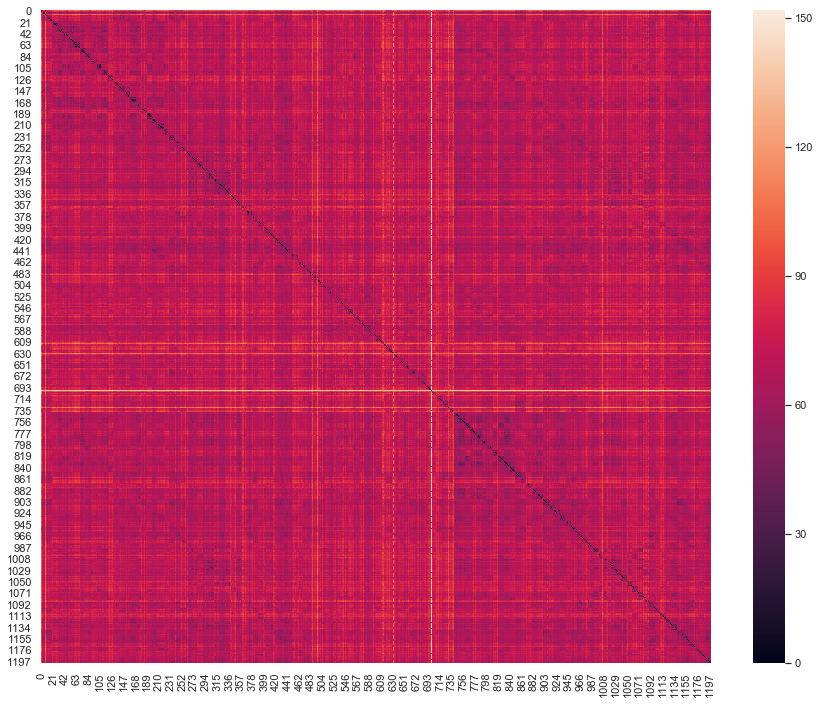

In [147]:
cmap = sns.set(style="darkgrid")


f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(dist_matrix, cmap=cmap, annot=False)

What we expect to see is the pairwise differences should be relatively small within each type of letter, and the pairwise differences should be large between different types of letters if the extracted features work well to identify a letter. In that case, there should be 24 dark squares along the diagnal which represent 24 letters. Unfortunately, the heat map seems no pattern which means using the extracted features would identify an image to any of the 24 letters, since there are relatively small distances in each type of letters. So, the extracted features using DAISY do not work well for our prediction task.

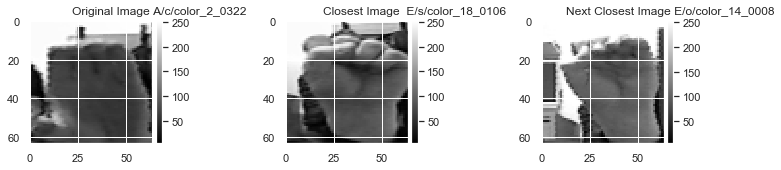

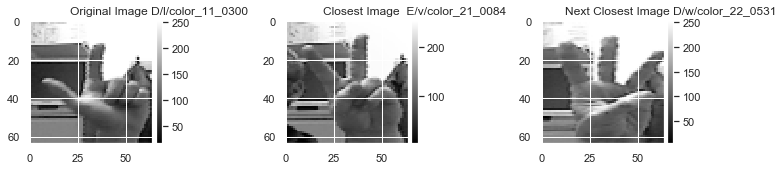

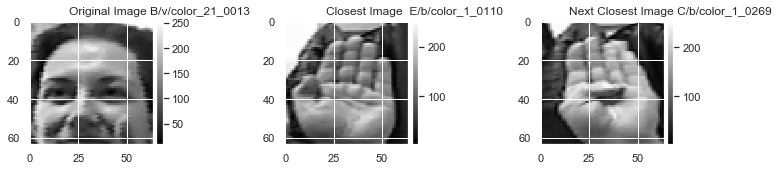

In [155]:
from ipywidgets import widgets  
import warnings
import copy
from ipywidgets import fixed
# put it together inside a nice widget
def closest_image(dmat,idx1):
    distances = copy.deepcopy(dmat[idx1,:]) # get all image diatances
    distances[idx1] = np.infty # dont pick the same image!
    idx2 = np.argmin(distances)
    
    distances[idx2] = np.infty
    idx3 = np.argmin(distances)
    
    plt.figure(figsize=(10,16))
    plt.subplot(1,3,1)
    imshow(X[idx1].reshape((h,w)),cmap=plt.cm.gray)
    plt.title("Original Image "+names[idx1])
    plt.grid()

    plt.subplot(1,3,2)
    imshow(X[idx2].reshape((h,w)),cmap=plt.cm.gray)
    plt.title("Closest Image  "+names[idx2])
    plt.grid()
    
    plt.subplot(1,3,3)
    imshow(X[idx3].reshape((h,w)),cmap=plt.cm.gray)
    plt.title("Next Closest Image "+names[idx3])
    plt.grid()
    
# widgets.interact(closest_image,idx1=(0,n_samples-1,1),dmat=fixed(dist_matrix),__manual=True)
# This allowed us to play widgets, however, it won't show in html, we list three typical pictures below 

closest_image(idx1=128,dmat=dist_matrix)
closest_image(idx1=688,dmat=dist_matrix)
closest_image(idx1=1107,dmat=dist_matrix)



By obsevering the pairwise distance matrix, it is very likely that we may predict i as v. Although they may look similar in some way, they are different letter in spelling English words. The reason why this happens may be is that daisy features are extracted from all over the picture, however, to identify an handshape we need to focus on certain areas of the picture. In our case, there are some irrelvant points matched (like TV behind or person's face).